## 利用 matplotlib 分析链家租房数据并制作可视化图表

### 1.读取 CSV 格式文件“task_2_lianjia_data.csv”，将数据命名为 lianjia_data，并选取前部数据查看

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
lianjia_data = pd.read_csv('task_2_lianjia_data.csv')
lianjia_data.head()

,简介（方式·小区名 户型 朝向）,区,地铁站,村,面积大小（㎡）,朝向,户型,楼层类型,楼层（层）,标签
0,整租·长桥一村 1室0厅 南,徐汇,长桥,长桥一村,39,南,1室0厅1卫,高楼层,6,随时看房
1,整租·馨宁公寓 1室1厅 南,徐汇,华泾,馨宁公寓,42,南,1室1厅1卫,高楼层,29,"精装,随时看房"
2,整租·长桥三村 2室1厅 南,徐汇,长桥,长桥三村,51,南,2室1厅1卫,高楼层,6,随时看房
3,整租·东湾小区 1室1厅 南,徐汇,华泾,东湾小区,47,南,1室1厅1卫,中楼层,6,随时看房
4,整租·花苑村紫竹园 1室1厅 南,徐汇,康健,花苑村紫竹园,42,南,1室1厅1卫,高楼层,6,随时看房


### 2.利用 groupby 函数，以【面积大小(m²)】字段进行 groupby，统计各个面积下的【房源数量】情况

In [2]:
df1 = lianjia_data.groupby('面积大小（㎡）')['区'].agg(房源数量='count')
df1

,房源数量
面积大小（㎡）,
7,1
9,3
10,1
11,1
12,1
...,...
152,1
155,1
162,1


### 3.将第(2)问所统计数据，作折线图和条形图，并得出相关结论
提示:先提取第(2)问 所得数据表的 index 索引，并转化成 list;再提取【房源数量】的值转成 list

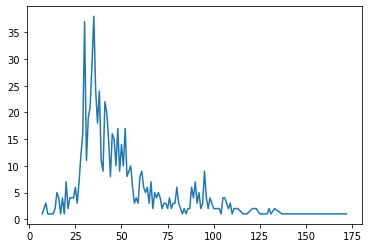

In [3]:
x = df1.index.values
y = df1['房源数量'].tolist()
plt.plot(x,y)
plt.show()

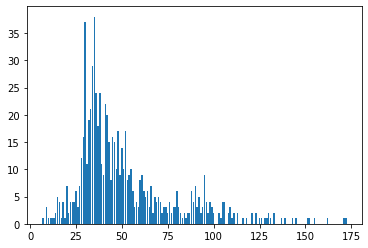

In [4]:
plt.bar(x,y)
plt.show()

### 4.利用 groupby 函数，以【区】字段进行 groupby，统计各个上海各个“区”所属的【房源数量】情况

In [5]:
df2 = lianjia_data.groupby('区')['村'].agg(房源数量='count')
df2

,房源数量
区,
嘉定,6
奉贤,1
徐汇,126
普陀,22
杨浦,56
松江,45
浦东,106
虹口,24
长宁,86


### 5.将第(4)问所统计数据，作条形图，并得出相关结论;

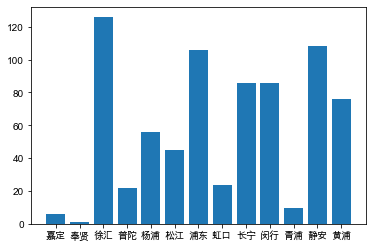

In [10]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus']=False
x1 = df2.index.values
y1 = df2['房源数量'].tolist()
plt.bar(x1,y1)
plt.show()

### 6.利用 groupby 函数，以【楼层类型】字段进行 groupby，统计各个楼层所属的【房源数量】情况;

In [13]:
df3 = lianjia_data.groupby(['楼层类型'])['村'].agg(房源数量='count')
df3

,房源数量
楼层类型,
中楼层,231
低楼层,146
地下室,5
高楼层,370


### 7.将第(6)问所统计数据，作饼图，并得出相关结论。

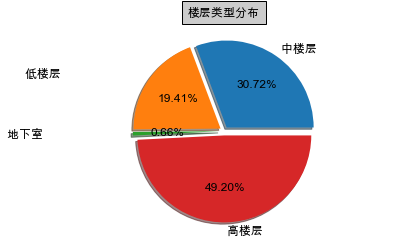

In [52]:
values = df3['房源数量'].tolist()
label = df3.index.values
expl = [0.05,0.05,0.05,0.05]    #离开圆心
plt.pie(values, labels=label, explode=expl, autopct='%1.2f%%',shadow=True)
plt.title('楼层类型分布', bbox={'facecolor':'0.8','pad':6})
plt.show()